# Data Mining Midterm Project (MSDA 9213)

**Project Title:** *Average daily temperature* prediction in Rwanda(daily Forecasting)

**Student:** GAHIGI Robert  
**Student ID:** 101101  
**Course:** Data Mining (MSDA 9213)  
**Academic Year:** 2025–2026, Semester 3  

---

---


In [73]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
#RANDOM_STATE = 42
#np.random.seed(RANDOM_STATE)


## 0.1 Loading dataset

In [74]:
# Load dataset
DATA_PATH = r"C:\Users\Gahigi\Desktop\DATA MINING\Temp-data_prediction.csv" 
df = pd.read_csv(DATA_PATH)

df.head()


,StationId,Station_Name,Latitude,Longitude,Elev,Year,Month,Day,Temp,Precip,RH,SUNSHNE,Windspeed,Cloud opacity,Vapour pressure
0,10101100,GITEGA,-1.96,30.06,1522,1970,1,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,10101100,GITEGA,-1.96,30.06,1522,1970,1,2,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,10101100,GITEGA,-1.96,30.06,1522,1970,1,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,10101100,GITEGA,-1.96,30.06,1522,1970,1,4,NaN,41.8,NaN,NaN,NaN,NaN,NaN
4,10101100,GITEGA,-1.96,30.06,1522,1970,1,5,NaN,6.8,NaN,NaN,NaN,NaN,NaN


## 1. Dataset Understanding

In [75]:
# Basic shape
print("Rows, Columns:", df.shape)
df.info()


Rows, Columns: (108353, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108353 entries, 0 to 108352
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StationId        108353 non-null  int64  
 1   Station_Name     108353 non-null  object 
 2   Latitude         108353 non-null  float64
 3   Longitude        108353 non-null  float64
 4   Elev             108353 non-null  int64  
 5   Year             108353 non-null  int64  
 6   Month            108353 non-null  int64  
 7   Day              108353 non-null  int64  
 8   Temp             26445 non-null   float64
 9   Precip           103905 non-null  float64
 10  RH               33659 non-null   float64
 11  SUNSHNE          23362 non-null   float64
 12  Windspeed        12178 non-null   float64
 13  Cloud opacity    40899 non-null   float64
 14  Vapour pressure  27092 non-null   float64
dtypes: float64(9), int64(5), object(1)
memory usage: 12.4+ MB

In [76]:
# Basic numeric statistics (numeric)
df.describe(include="all").T.head(20)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
StationId,108353.0,NaN,NaN,NaN,31554620.530119,12121790.024176,10101100.0,20503100.0,30304100.0,40503100.0,50605100.0
Station_Name,108353,11,GIKONGORO MET,17999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,108353.0,NaN,NaN,NaN,-1.910213,0.400088,-2.6,-2.16,-1.81,-1.59,-1.28
Longitude,108353.0,NaN,NaN,NaN,29.797762,0.353265,29.26,29.63,29.74,30.05,30.53
Elev,108353.0,NaN,NaN,NaN,1781.723866,242.61799,1377.0,1554.0,1750.0,1941.0,2235.0
Year,108353.0,NaN,NaN,NaN,1999.873294,18.605015,1970.0,1981.0,2005.0,2017.0,2025.0
Month,108353.0,NaN,NaN,NaN,6.483365,3.437544,1.0,4.0,6.0,9.0,12.0
Day,108353.0,NaN,NaN,NaN,15.732799,8.799851,1.0,8.0,16.0,23.0,31.0
Temp,26445.0,NaN,NaN,NaN,18.669467,2.282974,0.0,17.2,18.8,20.3,30.4
Precip,103905.0,NaN,NaN,NaN,3.326874,7.544899,0.0,0.0,0.0,3.0,140.6


In [77]:
# Missing values summary
missing = df.isna().sum().sort_values(ascending=False)
missing[missing>0]


Windspeed          96175
SUNSHNE            84991
Temp               81908
Vapour pressure    81261
RH                 74694
Cloud opacity      67454
Precip              4448
dtype: int64

In [78]:
# Period covered + stations count
tmp = df.copy()
tmp.columns = tmp.columns.str.strip()
# what below loop means: If Year/Month/Day exist, compute period; otherwise, skip.
if set(["Year","Month","Day"]).issubset(tmp.columns):
    tmp["date"] = pd.to_datetime(tmp[["Year","Month","Day"]], errors="coerce")
    print("Date range:", tmp["date"].min(), "to", tmp["date"].max())
if "StationId" in tmp.columns:
    print("Number of stations:", tmp["StationId"].nunique())


Date range: 1970-01-01 00:00:00 to 2025-12-31 00:00:00
Number of stations: 11


## 2. Data Cleaning & Preprocessing

In [79]:
# Copy + standardize column names
cleaned_df = df.copy()
cleaned_df.columns = cleaned_df.columns.str.strip()

# Create date from Year/Month/Day 
cleaned_df["date"] = pd.to_datetime(cleaned_df[["Year","Month","Day"]], errors="coerce")

# Drop rows missing key identifiers
cleaned_df = cleaned_df.dropna(subset=["StationId","date","Temp"])

# Sort by station and time
cleaned_df = cleaned_df.sort_values(["StationId","date"]).reset_index(drop=True)

cleaned_df.head()


,StationId,Station_Name,Latitude,Longitude,Elev,Year,Month,Day,Temp,Precip,RH,SUNSHNE,Windspeed,Cloud opacity,Vapour pressure,date
0,10101100,GITEGA,-1.96,30.06,1522,2010,4,1,19.3,3.4,81.0,3.2,NaN,6.25,19.8,2010-04-01
1,10101100,GITEGA,-1.96,30.06,1522,2010,4,2,18.4,5.2,86.0,1.2,NaN,6.50,19.4,2010-04-02
2,10101100,GITEGA,-1.96,30.06,1522,2010,4,3,19.8,5.3,74.0,4.9,NaN,6.50,19.5,2010-04-03
3,10101100,GITEGA,-1.96,30.06,1522,2010,4,4,21.1,3.6,75.0,4.8,NaN,5.75,20.6,2010-04-04
4,10101100,GITEGA,-1.96,30.06,1522,2010,4,5,20.6,0.0,77.0,1.9,NaN,7.25,20.4,2010-04-05


In [80]:
# Fix abnormal temperatures for Rwanda: treat <=0°C as missing
zero_count = (cleaned_df["Temp"] <= 0).sum()
print("abnormal Temp (<=0°C) count:", zero_count)

cleaned_df.loc[cleaned_df["Temp"] <= 0, "Temp"] = np.nan
cleaned_df = cleaned_df.dropna(subset=["Temp"]).reset_index(drop=True)

print("After cleaning rows become:", cleaned_df.shape[0])


abnormal Temp (<=0°C) count: 30
After cleaning rows become: 26415


**VERY IMPORTANT (for your report):** Mention how many values were fixed (e.g., 28 values ≤ 0°C treated as missing).

## 3. Feature Engineering

In [81]:
# Lag features and targets (per station)
cleaned_df["Temp_lag1"] = cleaned_df.groupby("StationId")["Temp"].shift(1)
cleaned_df["Temp_lag2"] = cleaned_df.groupby("StationId")["Temp"].shift(2)

# Next-day target for regression
cleaned_df["Temp_next_day"] = cleaned_df.groupby("StationId")["Temp"].shift(-1)

# Drop rows where target/lags missing (start/end of each station series)
cleaned_df = cleaned_df.dropna(subset=["Temp_lag1","Temp_lag2","Temp_next_day"]).reset_index(drop=True)

cleaned_df[["StationId","date","Temp","Temp_lag1","Temp_lag2","Temp_next_day"]].head()


,StationId,date,Temp,Temp_lag1,Temp_lag2,Temp_next_day
0,10101100,2010-04-03,19.8,18.4,19.3,21.1
1,10101100,2010-04-04,21.1,19.8,18.4,20.6
2,10101100,2010-04-05,20.6,21.1,19.8,16.3
3,10101100,2010-04-06,16.3,20.6,21.1,17.9
4,10101100,2010-04-07,17.9,16.3,20.6,21.1


### 3.1 Classification target 

In [82]:
# Hot tomorrow threshold (median of next-day temperature)
threshold = cleaned_df["Temp_next_day"].median()
cleaned_df["Hot_tomorrow"] = (cleaned_df["Temp_next_day"] >= threshold).astype(int)

print("Hot threshold (median Temp_next_day):", threshold)
cleaned_df["Hot_tomorrow"].value_counts()


Hot threshold (median Temp_next_day): 18.9


Hot_tomorrow
1    13206
0    13179
Name: count, dtype: int64

### 3.2 Handle missing predictors (median imputation for predictors only)

In [83]:
# Candidate predictors (adjust if your dataset uses different names)
candidate_predictors = ["Temp_lag1","Temp_lag2","RH","SUNSHNE","Cloud_opacity","Windspeed","Vapour_pressure"]
available_predictors = [c for c in candidate_predictors if c in cleaned_df.columns]
print("Predictors used:", available_predictors)

for col in available_predictors:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())


Predictors used: ['Temp_lag1', 'Temp_lag2', 'RH', 'SUNSHNE', 'Windspeed']


## 4. Exploratory Data Analysis (EDA)

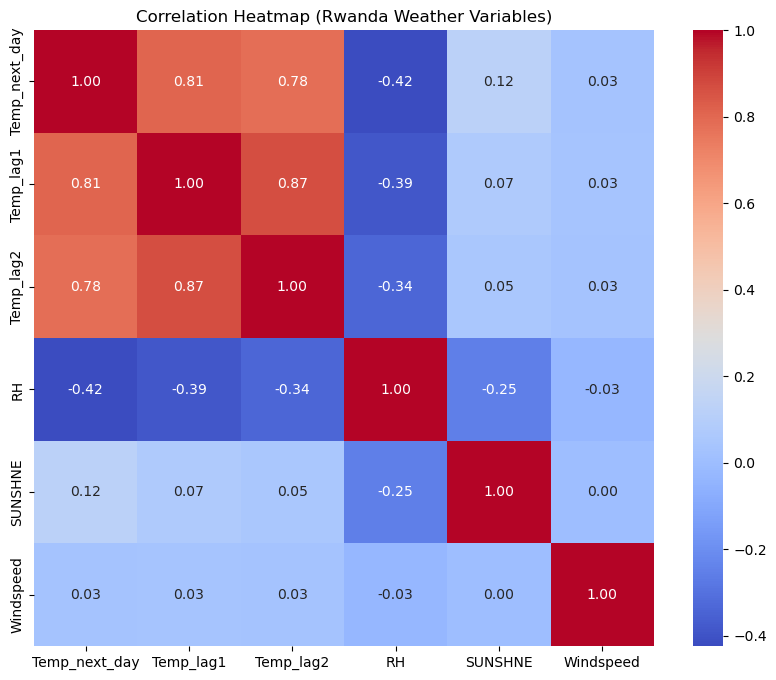

In [84]:
# 4.1 Correlation heatmap (core predictors)
corr_cols = ["Temp_next_day"] + available_predictors
plt.figure(figsize=(10,8))
sns.heatmap(cleaned_df[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Rwanda Weather Variables)")
plt.show()


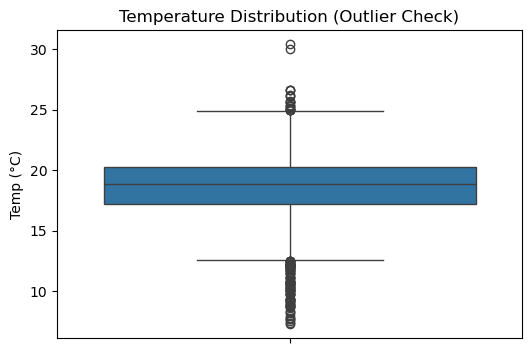

In [85]:
# 4.2 Temperature distribution boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=cleaned_df["Temp"])
plt.title("Temperature Distribution (Outlier Check)")
plt.ylabel("Temp (°C)")
plt.show()


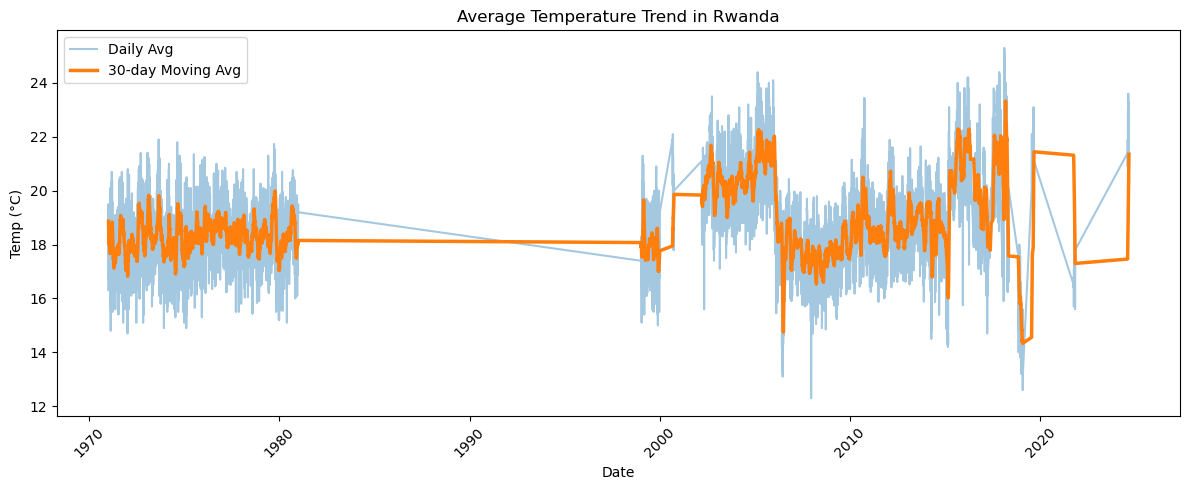

In [86]:
# 4.3 Smoothed average temperature trend (daily average + 30-day moving average)
daily_avg = cleaned_df.groupby("date")["Temp"].mean().reset_index()
daily_avg["Temp_smooth_30d"] = daily_avg["Temp"].rolling(window=30, min_periods=10).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_avg["date"], daily_avg["Temp"], alpha=0.4, label="Daily Avg")
plt.plot(daily_avg["date"], daily_avg["Temp_smooth_30d"], linewidth=2.5, label="30-day Moving Avg")
plt.title("Average Temperature Trend in Rwanda")
plt.xlabel("Date"); plt.ylabel("Temp (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


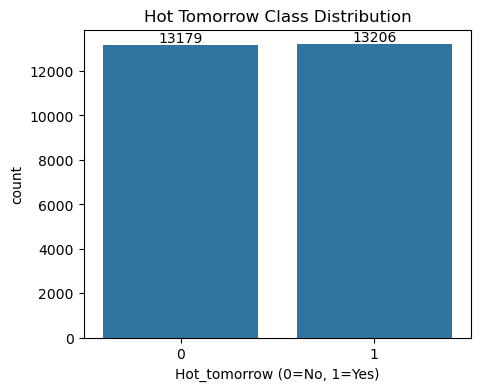

In [87]:
# 4.4 Hot tomorrow class distribution
plt.figure(figsize=(5,4))

ax = sns.countplot(x=cleaned_df["Hot_tomorrow"])

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.title("Hot Tomorrow Class Distribution")
plt.xlabel("Hot_tomorrow (0=No, 1=Yes)")
plt.show()


## 5. Train/Test Split (time-aware per station)
This avoids leakage by ensuring each station is split chronologically.

In [88]:
from sklearn.model_selection import train_test_split

def time_split_per_station(data, station_col="StationId", date_col="date", test_frac=0.2):
    train_parts, test_parts = [], []
    for sid, g in data.groupby(station_col):
        g = g.sort_values(date_col)
        n = len(g)
        cut = int(np.floor((1 - test_frac) * n))
        train_parts.append(g.iloc[:cut])
        test_parts.append(g.iloc[cut:])
    return pd.concat(train_parts).reset_index(drop=True), pd.concat(test_parts).reset_index(drop=True)

train_df, test_df = time_split_per_station(cleaned_df, test_frac=0.2)
print("Train size:", train_df.shape, "Test size:", test_df.shape)


Train size: (21105, 20) Test size: (5280, 20)


## 6. Modeling (MAIN TASK: Regression)

In [89]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# X/y
X_train = train_df[available_predictors]
y_train = train_df["Temp_next_day"]
X_test  = test_df[available_predictors]
y_test  = test_df["Temp_next_day"]


def eval_reg(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # ← FIX HERE
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2



### 6.1 Model 1: Linear Regression

In [91]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred_lr = lr_reg.predict(X_test)

mae_lr, rmse_lr, r2_lr = eval_reg(y_test, pred_lr)
(mae_lr, rmse_lr, r2_lr)


(0.9697467135393748, np.float64(1.2696266274805494), 0.7075714833439171)

### 6.2 Model 2: Random Forest Regressor

In [92]:
rf_reg = RandomForestRegressor(
    n_estimators=300,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

mae_rf, rmse_rf, r2_rf = eval_reg(y_test, pred_rf)
(mae_rf, rmse_rf, r2_rf)


(1.053918207345754, np.float64(1.383700214108871), 0.6526624846626858)

### 6.3 Model 3 (Deep Learning): MLP Regressor

In [93]:
mlp_reg = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(hidden_layer_sizes=(64,32),
                        random_state=RANDOM_STATE,
                        max_iter=500))
])
mlp_reg.fit(X_train, y_train)
pred_mlp = mlp_reg.predict(X_test)

mae_mlp, rmse_mlp, r2_mlp = eval_reg(y_test, pred_mlp)
(mae_mlp, rmse_mlp, r2_mlp)


(0.961565114583232, np.float64(1.2731040728862804), 0.7059673947005096)

### 6.4 Regression comparison table

In [25]:
reg_results = pd.DataFrame([
    {"Task":"Regression", "Model":"Linear Regression", "MAE":mae_lr, "RMSE":rmse_lr, "R2":r2_lr},
    {"Task":"Regression", "Model":"Random Forest Regressor", "MAE":mae_rf, "RMSE":rmse_rf, "R2":r2_rf},
    {"Task":"Regression", "Model":"MLP Regressor", "MAE":mae_mlp, "RMSE":rmse_mlp, "R2":r2_mlp},
]).sort_values("RMSE")

reg_results


,Task,Model,MAE,RMSE,R2
0,Regression,Linear Regression,0.969747,1.269627,0.707571
2,Regression,MLP Regressor,0.961565,1.273104,0.705967
1,Regression,Random Forest Regressor,1.053918,1.383700,0.652662


## 7. Model Improvement ( Parameter Tuning) — Regression Focus

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [200, 300, 500, 800],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf_base = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)

search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=3,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

search.fit(X_train, y_train)
best_rf = search.best_estimator_
search.best_params_


{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

In [27]:
# Evaluate tuned model
pred_best = best_rf.predict(X_test)
mae_best, rmse_best, r2_best = eval_reg(y_test, pred_best)
(mae_best, rmse_best, r2_best)


(0.9757842971795812, np.float64(1.2940622856319), 0.696206807754997)

In [28]:
# Before vs after tuning
improve_table = pd.DataFrame([
    {"Model":"Random Forest (Before)", "MAE":mae_rf, "RMSE":rmse_rf, "R2":r2_rf},
    {"Model":"Random Forest (After)",  "MAE":mae_best, "RMSE":rmse_best, "R2":r2_best},
])
improve_table


,Model,MAE,RMSE,R2
0,Random Forest (Before),1.053918,1.383700,0.652662
1,Random Forest (After),0.975784,1.294062,0.696207


## 8. Cross-Validation Summary (TimeSeriesSplit) — specifically for Weather

In [29]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

# Use the tuned model if available; otherwise use rf_reg
model_for_cv = best_rf if 'best_rf' in globals() else rf_reg

ts_rmse = -cross_val_score(
    model_for_cv,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=tscv
)

print("TimeSeriesSplit RMSE per fold:", ts_rmse)
print("Mean RMSE:", ts_rmse.mean())
print("Std RMSE:", ts_rmse.std())


TimeSeriesSplit RMSE per fold: [1.55644724 1.2630835  1.42467043 1.11896543 1.33914839]
Mean RMSE: 1.3404629989519827
Std RMSE: 0.1475063192731624


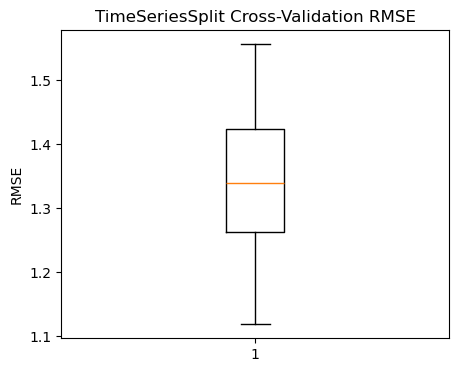

In [30]:
# CV RMSE boxplot
plt.figure(figsize=(5,4))
plt.boxplot(ts_rmse)
plt.title("TimeSeriesSplit Cross-Validation RMSE")
plt.ylabel("RMSE")
plt.show()


## 9. Feature Importance

In [31]:
# Feature importance from Random Forest (best_rf or rf_reg)
rf_for_fi = best_rf if 'best_rf' in globals() else rf_reg

fi = pd.DataFrame({
    "Feature": available_predictors,
    "Importance": rf_for_fi.feature_importances_
}).sort_values("Importance", ascending=False)

fi


,Feature,Importance
0,Temp_lag1,0.491142
1,Temp_lag2,0.357236
2,RH,0.101174
3,SUNSHNE,0.047325
4,Windspeed,0.003124


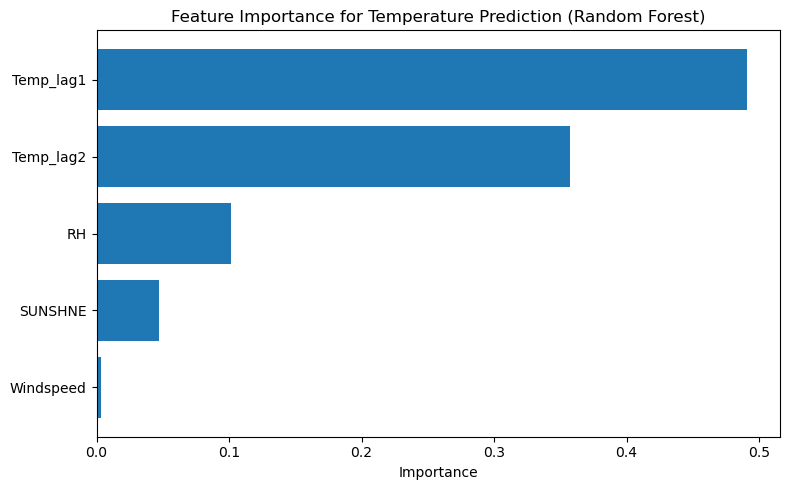

In [32]:
plt.figure(figsize=(8,5))
plt.barh(fi["Feature"], fi["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance for Temperature Prediction (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


## 10.(classification + clustering) but focus should be more on regression 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

Xc_train = train_df[available_predictors]
yc_train = train_df["Hot_tomorrow"]
Xc_test  = test_df[available_predictors]
yc_test  = test_df["Hot_tomorrow"]

def eval_clf(y_true, y_prob):
    y_pred = (y_prob >= 0.5).astype(int)
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_prob)
    }

log_clf = Pipeline(steps=[("scaler", StandardScaler()),
                         ("log", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))])
log_clf.fit(Xc_train, yc_train)
prob_log = log_clf.predict_proba(Xc_test)[:,1]
res_log = eval_clf(yc_test, prob_log)

rf_clf = RandomForestClassifier(n_estimators=400, random_state=RANDOM_STATE, n_jobs=-1)
rf_clf.fit(Xc_train, yc_train)
prob_rf_clf = rf_clf.predict_proba(Xc_test)[:,1]
res_rf = eval_clf(yc_test, prob_rf_clf)

mlp_clf = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mlp", MLPClassifier(hidden_layer_sizes=(64,32),
                                               max_iter=500,
                                               random_state=RANDOM_STATE))])
mlp_clf.fit(Xc_train, yc_train)
prob_mlp = mlp_clf.predict_proba(Xc_test)[:,1]
res_mlp = eval_clf(yc_test, prob_mlp)

clf_results = pd.DataFrame([
    {"Task":"Classification", "Model":"Logistic Regression", **res_log},
    {"Task":"Classification", "Model":"Random Forest", **res_rf},
    {"Task":"Classification", "Model":"MLP Classifier", **res_mlp},
]).sort_values("F1", ascending=False)

clf_results


,Task,Model,Accuracy,F1,ROC_AUC
2,Classification,MLP Classifier,0.841477,0.860894,0.917089
0,Classification,Logistic Regression,0.839015,0.857095,0.915761
1,Classification,Random Forest,0.825568,0.846115,0.895498


Best K: 3 Silhouette: 0.3167257866281937


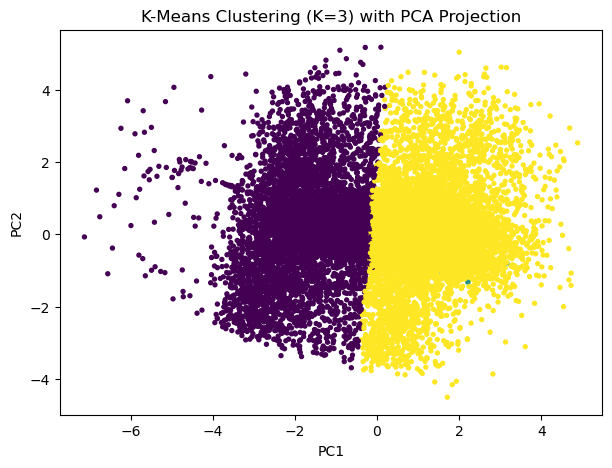

In [34]:
# --- Clustering (brief) ---
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X_cluster = cleaned_df[available_predictors].copy()

# Scale for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Choose K by silhouette (small range)
scores = {}
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    labels = km.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

best_k = max(scores, key=scores.get)
print("Best K:", best_k, "Silhouette:", scores[best_k])

km = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10)
labels = km.fit_predict(X_scaled)

# PCA visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
xy = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(xy[:,0], xy[:,1], c=labels, s=8)
plt.title(f"K-Means Clustering (K={best_k}) with PCA Projection")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


### Clustering Interpretation
K-Means clustering with K=3 grouped the Rwanda weather data into three main patterns. The PCA plot shows that the clusters are mostly separated along the first principal component, meaning that the main variation in the weather data has been captured well. The silhouette score of 0.317 indicates moderate but meaningful clustering, which is reasonable for weather data because atmospheric conditions change gradually. Overall, the three clusters likely represent dry, normal, and wet weather conditions in Rwanda

## 11. Final Conclusion

In [35]:
# Auto-summary helpers (optional)
best_reg = reg_results.iloc[0]
print("Best regression model (by RMSE):", best_reg["Model"])
print("RMSE:", best_reg["RMSE"], "MAE:", best_reg["MAE"], "R2:", best_reg["R2"])

print("\nTuning impact (RF before vs after):")
display(improve_table)

print("\nTimeSeriesSplit CV RMSE mean/std:")
print(ts_rmse.mean(), ts_rmse.std())

print("\nTop predictors by importance:")
display(fi.head(5))


Best regression model (by RMSE): Linear Regression
RMSE: 1.2696266274805494 MAE: 0.9697467135393748 R2: 0.7075714833439171

Tuning impact (RF before vs after):


,Model,MAE,RMSE,R2
0,Random Forest (Before),1.053918,1.383700,0.652662
1,Random Forest (After),0.975784,1.294062,0.696207



TimeSeriesSplit CV RMSE mean/std:
1.3404629989519827 0.1475063192731624

Top predictors by importance:


,Feature,Importance
0,Temp_lag1,0.491142
1,Temp_lag2,0.357236
2,RH,0.101174
3,SUNSHNE,0.047325
4,Windspeed,0.003124
